## Adding data to maps
Use Matplotlib's plot, scatter, imshow, pcolor, contourf etc. and add the `transform` argument, specifying the CRS your data are defined in.

When a source projection is provided to one of it’s plotting methods, using the transform keyword, the standard Matplotlib plot result is transformed from source coordinates to the target projection.

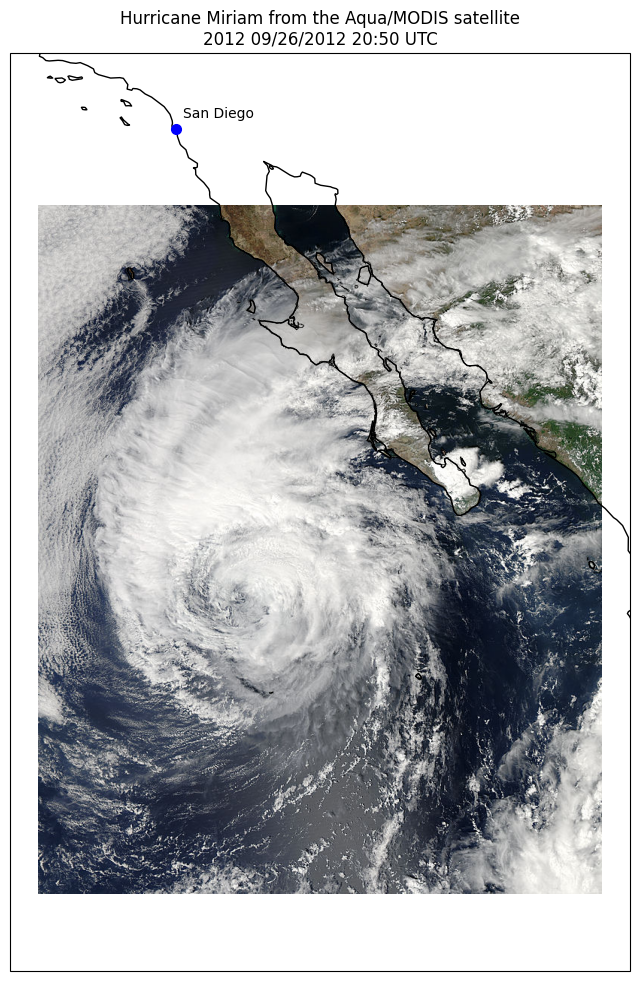

In [1]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = config["repo_data_dir"] / 'raster' / 'sample' / 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

ax.use_sticky_edges = False
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines()

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()